# Week 5 Lab Report

**Due: Monday 5/6/19 11:59pm**

**Partner:** (optional)

## Introduction

**Background (<font color="red">Intro-Q1</font> - 2 pts)**: Provide 3-5 sentences of background and motivation for the analysis you are doing in the lab. e.g. What transcription factors are we looking at, why are those important?

The exercises done in this lab look into the general pipeline of ChIP-sequencing analysis. It shows how it is done, why it is important and most significantly what it tells you about the data. ChIP-sequencing is used to identify areas of the genome in noncoding regions and to determine what the sequences are as well as the function. The focus here is particualrly aimed at ChIP-sequence reads of three of the "Yamanaka factors" as well as a few other histone modification sites. The "Yamanaka factors" are a type of transcription factor and it has been shown that treatment of cells with these specific transcription factors can make cells "pluripotent" again. This means that they can unspecialize what a cell is such that it can be reprogrammed to any cell in its cell lines. 

**Summary of your findings (<font color="red">Intro-Q2</font> - 2 pts)**: Provide 3-5 sentences summarizing the datasets you analyzed and the findings of your analyses. For example: describe where the different transcription factors and histone modifications are binding and any interesting patterns you found in your motif analysis.

The analysis comes from the three transcription factors, Oct4, Klf4, and Sox2, as well as from two histone modifications, H3K27ac and H3K4me2. For each case motifs are identified as well as the possible sequence. The statistical significance for each identified site, motif and sequence comes from comparison with the control and reference genome GRCm38.

The results of the motfis identified match very similarly with those on the HOCOMOCO website. Further anaylsis had to be done bewteen the Oct4 and Sox2 tf's since they were both outputting the same motif. The differential analysis identified the motif's that were specific to Sox2 by taking values where fold change was greater than two. It is also interesting to see that there are many location along the whole genome that match the motif pattern found from Oct4. However there are is a very small percentage of those total matches where binding actually occurs.


## Methods

**Dataset description (<font color="red">Methods-Q1</font> - 2 pts)**: Summarize the datasets we are starting with: what samples are we analyzing? Where did they come from? How many reads are there in each dataset, and what is the read length?

For each transcrption factor and histone modification, reads from ChIP-sequencing are available. These exist as standard DNA fragment reads in fastq files. The only difference is that specific DNA framgents are targeted by using antibodies to pull down fragments with specific sequences. For all the datasets there is also a control which is generated in the standard DNa fragmentation pipeline, ie. no antibody pulldown for specific sequences. The control is used to compare to and shows what would exist if the antibody pulldown wasn't used. Furthermore we have the reference genome GRCm38 and Oct4_motif file for the motif anaylsis. The following datasets are described below and analyzed with fastqc:

* Oct4.esc.fastq: Total sequences = 1999998, Sequence length = 50
* Klf4.esc.fastq: Total sequences = 1999998, Sequence length = 50
* Sox2.esc.fastq: Total sequences = 1999998, Sequence length = 50
* H3K27ac.esc.fastq: Total sequences = 1711167, Sequence length = 50
* H3K4me2.esc.fastq: Total sequences = 1999998, Sequence length = 50
* input.esc.fastq: Total sequences = 1999998, Sequence length = 50

**Alignment (<font color="red">Methods-Q2</font> - 2 pts)**: Summarize the methods you used to align the data. What aligner and version did you use? What build of the reference genome?

To align the data to the reference genome first an index of the genome is created. This is already done for us since it takes a lot of time. The alignment and indexing is done with bwa mem (the version can be checked from the bam file output header using samtools, version used here is: VN:0.7.17-r1198-dirty). The output of bwa mem is .sam file, but a lot of tools (sorting and indexing) to analyze the alignment run on the compressed or binary formats of these alignments. Hence samtools (version 1.9) is used to compress the alignments (.sam) to .bam files.

Align the fastq files and compress them with Samtools. The reference genome used in the scenario is GRCm38.fa (mouse genome mm10). Using 6 threads significantly increases the processing time.

```shell
for prefix in Oct4 Klf4 Sox2 H3K27ac H3K4me2 input

do
    bwa mem -t 6 /datasets/cs185s-sp19-public/genomes/GRCm38.fa /datasets/cs185s-sp19-public/week5/${prefix}.esc.fastq | samtools view -bS > ${prefix}.bam
done
```

**Peak calling (<font color="red">Methods-Q3</font> - 2 pts)**: Summarize the methods you used to call peaks for each sample the data. What tool(s) did you use? Did you use any non-default parameters? Did you use a different command for transcription factors vs. histone modifications?

A tool called Homer is used to call peaks or identify where the peaks in our data exist. The threshold that identifies peaks is if there is a four-fold larger number of alignments to any given position when compared with the control experiment. In order to make use of Homer first tag directories are created (similar idea to indexing). This is done below.

```shell
for prefix in Oct4 Klf4 Sox2 H3K27ac H3K4me2 input

do
    makeTagDirectory ~/week5/tagdirs/${prefix} ~/week5/bam_files/${prefix}.bam
done
```

Once the tag directories are created we can use them to find the peaks for each file. The commands to do so are shown below as well. For transcription factors the style 'factor' is specified ('histone' for histone modifications) to indicate which type of peak to look for. Histone peaks are more narrow when comapred to histones in general. The output for the peak detection for transcription factors is a peaks.txt file and for histones it is a regions.txt file. The commands for histones and transcription factors are as follows:


```shell
for prefix in Oct4 Klf4 Sox2

do
    findPeaks ~/week5/tagdirs/${prefix} -i ~/week5/tagdirs/input -style factor -o auto
done

for prefix in H3K27ac H3K4me2

do
    findPeaks ~/week5/tagdirs/${prefix} -i ~/week5/tagdirs/input -style histone -o auto
done
```

**Annotating peak regions (<font color="red">Methods-Q4</font> - 3 pts)**: Summarize the methods you used to annotate peaks for each sample the data and visualize read counts around transcription start sites. What tool did you use? What reference genome and gene annotations? What library did you use for plotting your results?

The Homer utility annotatePeaks.pl is used to learn where the peaks are falling. It is used to visualize read counts around the promoter regions.
The mouse genome GRCm38.fa is used along with the annotation file GRCm38.75.gtf. Then the libraries Pandas and Matplotlib.pyplot is used to import and plot the data in Python.

The command run to annotate peaks is:

```shell
annotatePeaks.pl tss \
  /datasets/cs185s-sp19-public/genomes/GRCm38.fa \
  -size 8000 \
  -hist 10 \
  -d ~/week5/tagdirs/Oct4 ~/week5/tagdirs/Sox2 ~/week5/tagdirs/Klf4 ~/week5/tagdirs/H3K4me2 ~/week5/tagdirs/H3K27ac \
  -gtf /datasets/cs185s-sp19-public/genomes/GRCm38.75.gtf > ~/week5/annotations/tss_histogram.txt
```

In the above command the first argument tss indicates to look at regions centered on transcription start sites. Then the reference genome, gene annotations and tag directories are indicated. The -size option tells the command to look at 8000 bp centered at each transcription start site. Lastly the -hist option gives the bin size when formatting into histogram format.

**Motif finding (<font color="red">Methods-Q5</font> - 3 pts)**: Summarize the methods you used to perform motif finding in each transcription factor. What tool did you use? Which version? Where did you get known motifs for comparison?

The HOMER tool findMotifsGenome.pl is used to find the motifs in each specific transcription factor. The version for this tool is the same as the version for the whole HOMER suite which is 4.10. This tool takes in the peaks.txt file which was generated by the other HOMER tool findpeaks. It also takes in the reference mouse genome (GRCm38.fa) as well as the flags to mask repeats and only look at regions of size 100.

Command run:

```shell
for prefix in Oct4 Klf4 Sox2

do
findMotifsGenome.pl \
 ~/week5/tagdirs/${prefix}/peaks.txt \
 /datasets/cs185s-sp19-public/genomes/GRCm38.fa \
 ~/week5/motifs/${prefix} \
 -mask -size 100 -p 5
done
```

This generates a .html file for each transcription factor. These can the be cross referenced and validated looking through the database at HOCOMOCO.

**Sox2 paek analysis (<font color="red">Methods-Q6</font> - 3 pts)**: Summarize the methods you used to analyze peaks specific to Sox2 (and not Oct4). What tools did you use? How did you extract Sox2-specific peaks?

To analyze the peaks specific to Sox2 first the peak sets from both Sox2 and Oct4 are merged using the Homer tool mergePeaks. This is run as:

```shell
mergePeaks ~/week5/tagdirs/Oct4/peaks.txt ~/week5/tagdirs/Sox2/peaks.txt > ~/week5/overlap/oct4_sox2_peaks_merged.txt
```

Then the annotate peaks function is run again on this merged dataset. Command is:

```shell
annotatePeaks.pl \
   ~/week5/overlap/oct4_sox2_peaks_merged.txt \
  /datasets/cs185s-sp19-public/genomes/GRCm38.fa \
  -d ~/week5/tagdirs/Oct4 ~/week5/tagdirs/Sox2 > ~/week5/overlap/oct4_sox2_scatter.txt
```

This generates a normalized counts in the last two columns of Oct4 and Sox2 values. Using these two columns we can look for the specific ones where the fold change is greater than two using pandas. The values with fold change greater than two can then be outputted into a bed file and new motif analysis run on that.

**Oct4 motif occurrences (<font color="red">Methods-Q7</font> - 3 pts)**: Summarize the methods you used to scan chr17 for matches to the Oct4 motif and overlap with ChIP-seq peaks for Oct4.

First we can find all of the motifs that occur on chrm 17 using fimo. The command to do so is:

```shell
fimo /datasets/cs185s-sp19-public/week5/OCT4_motif.meme /datasets/cs185s-sp19-public/week5/GRCm38.chr17.fa
```

This generates a few files. It gives a usefult html to visualize the results. It also gives a few files that contain the matched motifs and their positions. This file can be used to compare with the motifs found from our peaks. These peaked ones are the locations where the motif is actually bound to. Meaning that the TFs were in regions accessible to the antibodies.

To find the overlap, intersectBed can be used. The commands to run this is:

```shell
awk -F'\t' NR>1'{OFS=FS}{$1=17; print $0;}' fimo.gff > fimo.bed
sed -i '1d' fimo.bed
intersectBed -a ~/week5/tagdirs/Oct4/Oct4.peaks.bed -b ~/week5/bind/fimo_out/fimo.bed > overlaps.txt
wc -l overlaps.txt
```

The first command is to conver the .gff to a format that is comprable with the Oct4.peaks.bed. In order to do that simply remove the chr off the front of chr17 for the first column of the .gff file with awk. Then the sed command is used to remove the first line of the new .bed file. The intersection command is then run and the outputs are pipped to a text file where each line represents the overlap. wc -l overlaps.txt then tells how many lines there are indicating the number of matches to binded sites.

## Results

**Alignment results (<font color="red">Results-Q1</font> - 2 pts)**: What percentage of reads from each experiment aligned to the reference genome?

To check the results of the alignment samtools flagstat {prefix}.bam can be run on each outputted bam file. The total alignment results are very low for the ChIP-seq results. This makes sense since we are only targetting very specific sequences. 

* Oct4: 99.87% alignment
* Klf4: 99.61% alignment
* Sox2: 99.63% alignment
* H3K27ac: 99.72% alignment
* H3K4me2: 99.62% alignment
* input: 99.54% alignment

**Description of ChIP-seq signals (<font color="red">Results-Q2</font> - 5 pts)**: Based on visual inspection of the datasets on IGV, where are the peaks for each of the datasets falling (promoters? gene regions? exons? elsewhere?). How do the signals for the transcripton factors (Oct4, Sox2, and Klf4) compare to the signals for the two histone modifications? What does the input signal look like? Include a screenshot of the IGV visualization in your report.

First make Homer tag directories with a bash for loop (similar idea to indexing files).

```shell
for prefix in Oct4 Klf4 Sox2 H3K27ac H3K4me2 input

do
    makeTagDirectory ~/week5/tagdirs/${prefix} ~/week5/bam_files/${prefix}.bam
done
```

Then have to create the bedGraph files using the makeUCSCfile from Homer the command to do so is as follows:

"all you need to do is specify the tag directory and specify -o auto for the command to automatically save the bedGraph file inside the tag directory"

```shell
for prefix in Oct4 Klf4 Sox2 H3K27ac H3K4me2 input

do
    makeUCSCfile ~/week5/tagdirs/${prefix} -o auto
done
```
Once the bedGraph.gz files are created they can be visualized in IGV browser as shown below.

This image shows the whole mapped region of chrm17.
![caption](chrm17.PNG)



This image shows the region specific to gene Pouf51. It is interesting to see that for the transcription factors, the majority of the reads are falling in the noncoding regions of the sequence (upstream from Pou5f1). This makes sense since transcription factors are used in regulating the expression of genes. These areas hence can be promoter/enhacer regions. It is even more interesting to see that the histone modification reads are almost the inverse of the transcription factors. Areas where the histone modifications have large peaks the tf's are low and vice versa. The histone modifications also have peaks that fall into both the intron and exon portions of the gene Pou5f1. Lastly the control is shown to have reads mapped all over the place. Although there are some natural peaks occuring in similar spots as the tf's and histone sites. This makes sense since maybe these ares are just naturally more reachable and available to sequence and fragment. 

![caption](Pou5f1.PNG)


**Peak calling (<font color="red">Results-Q3</font> - 4 pts)**: Summarize peak-finding results: what was the IP efficiency reported for each dataset? How many peaks did you find for each? What is the average peak size (length) for each? Note you should only have 5 peak sets, since you won't have peaks for the input control. You may present your results as a table.

| Dataset | IP efficiency | Number of Peaks | Avg Peak Size (length) |
| --- | --- | --- | --- |
| Oct4 | 2.65% | 2203 | 75 |
| Klf4 | 3.12% | 3020 | 75 |
| Sox2 | 2.74% | 2236 | 75 |
| H3K27ac | 28.57% | 2102 | 500 |
| H3K4me2 | 70.02% | 3060 | 500 |


Convert the 'peak' file to a bed file for viewing.

```shell
for prefix in Oct4 Klf4 Sox2 

do
    pos2bed.pl ${prefix}/peaks.txt > ${prefix}/${prefix}.peaks.bed
done


for prefix in H3K27ac H3K4me2

do
    pos2bed.pl ${prefix}/regions.txt > ${prefix}/${prefix}.regions.bed
done
```

Visualizing the peaks below in IGV:

![caption](bed_files.PNG)

The coverage profile with high ip efficiency scores show lots large peaks as demonstrated with the large blue line. The histones in general have larger peaks where as the transcription factors are very narrowed peaked.

**Peak annotation (<font color="red">Results-Q4</font> - 5 pts)**: Generate a composite plot showing the distribution of all five datasets around TSSs. Be sure to label your axes and provide a legend or description of which color denotes which dataset. Plot transcription factors and histone modifications on separate plots to more easily see differences.

Populating the interactive namespace from numpy and matplotlib


,dist.from.tss,Oct4,Sox2,Klf4,H3K4me2,H3K27ac
0,-4000,0.894853,0.816687,0.929456,1.465848,1.165416
1,-3990,0.890395,0.807531,0.927906,1.467393,1.170515
2,-3980,0.881561,0.804261,0.920969,1.469015,1.171071
3,-3970,0.888774,0.802299,0.920071,1.469324,1.171164
4,-3960,0.882209,0.792080,0.915256,1.482844,1.179044


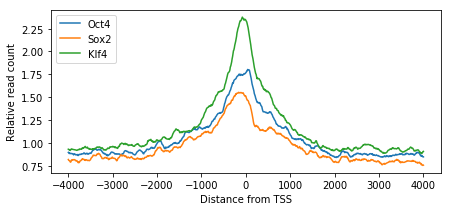

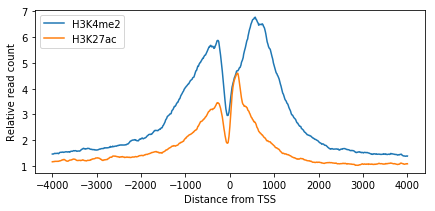

In [3]:
%pylab inline
import pandas as pd

data = pd.read_csv("~/week5/annotations/tss_histogram.txt", sep="\t")

# Reset column headers to make them easier to deal with
marks = ["Oct4","Sox2","Klf4","H3K4me2","H3K27ac"]

colnames = ["dist.from.tss"]
for m in marks: colnames.extend(["%s"%m,"%s:+"%m,"%s:-"%m])
data.columns = colnames
data = data[["dist.from.tss"]+marks]

# Peek at the dataframe
display(data.head())

fig = plt.figure()
fig.set_size_inches((7, 3))
ax = fig.add_subplot(111)
ax.plot(data["dist.from.tss"], data["Oct4"], label="Oct4");
ax.plot(data["dist.from.tss"], data["Sox2"], label="Sox2");
ax.plot(data["dist.from.tss"], data["Klf4"], label="Klf4");
ax.set_xlabel("Distance from TSS")
ax.set_ylabel("Relative read count")
ax.legend(loc="upper left");

fig = plt.figure()
fig.set_size_inches((7, 3))
ax = fig.add_subplot(111)
ax.plot(data["dist.from.tss"], data["H3K4me2"], label="H3K4me2");
ax.plot(data["dist.from.tss"], data["H3K27ac"], label="H3K27ac");
ax.set_xlabel("Distance from TSS")
ax.set_ylabel("Relative read count")
ax.legend(loc="upper left");

**Motif results (<font color="red">Results-Q5</font> - 8 pts)**: Which motifs did you find to be most enriched for each factor? Include a figure comparing the top motif logos you found compared to published logos for those factors. How similar are they?

## Top 3 motifs for Oct4:
![caption](top_motifsOct4.PNG)

## The top motif listed from HOCOMOCO (forward and reverse complement):
Forward complement
![caption](oct4_forward.png)

Reverse complement
![caption](oct4_reverse.png)


We see that the top motifs match in the location of big T's and A's. The motif from HOCOMOCO is longer than the one given from the HOMER analysis. You have to compare the same bases to see the similarity.

## Top 3 motifs for Klf4:
![caption](top_motifsklf4.PNG)

## The top motif listed from HOCOMOCO (forward and reverse complement):
Forward complement
![caption](klf4_forward.png)

Reverse complement
![caption](klf4_reverse.png)

It seems that the top motif from the HOMER analysis actually matches the reverse complement found online with HOCOMOCO.

## Top 3 motifs for Sox2:
![caption](top_motifssox2.PNG)

## The top motif listed from HOCOMOCO (forward and reverse complement):
Forward complement
![caption](sox2_forward.png)

Reverse complement
![caption](sox2_reverse.png)

The top motif found in the HOMER analysis matches the top motif from HOCOMOCO. Have to take into account for the different motif lengths. It is interesting to see that the top motif of Oct4 is very similar to that of sox2. Furthermore the 2nd top motif for both Oct4 and klf4 are very similar as well.

**Cooperative binding (<font color="red">Results-Q6</font> - 6 pts)**: Draw a scatter plot of Oct4 vs. Sox2 binding based on the output of `annotatePeaks.pl` on the merge dpeak set. Color points corresponding to peaks with more than two-fold higher binding in Sox2 vs. Oct4. 

Text(0,0.5,'Sox2 Normalized')

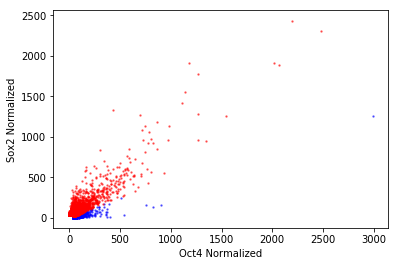

In [24]:
overlap = pd.read_csv('../week5/overlap/oct4_sox2_scatter.txt', sep='\t')
indexes = 2*overlap.iloc[:,-1]>overlap.iloc[:,-2]

#-1 is sox2, -2 is Oct4
background = overlap[~indexes]
fold2 = overlap[indexes]

fig = plt.figure()
fig.set_size_inches((6, 4))
ax = fig.add_subplot(111)
ax.scatter(background.iloc[:,-2], background.iloc[:,-1], s=2, alpha=0.5, label='background',color='b')
ax.scatter(fold2.iloc[:,-2], fold2.iloc[:,-1], s=2, alpha=0.5, label='2foldchange',color='r')
ax.set_xlabel("Oct4 Normalized")
ax.set_ylabel("Sox2 Normalized")

**Cooperative binding (<font color="red">Results-Q7</font> - 8 pts)**: Repeat motif finding, but this time using only the peaks that were unique to Sox2 (fold change >2). Report the motif you found. Is this different than the motif you found when analyzing *all* Sox2 peaks? Does this match to published motifs for Sox2?

In [22]:
#Method used to filter for sox2 values with fold change >2 and output to bed file for motif analysis
filt_foldchange = pd.read_csv('../week5/overlap/oct4_sox2_scatter.txt', sep='\t')
indexes = 2*filt_foldchange.iloc[:,-1]>filt_foldchange.iloc[:,-2]
outfile = filt_foldchange[indexes]
outfile.to_csv('sox2_2foldchange.bed',sep='\t',index=False)

Command to run on the outputted bed file using sox2 values with greater than 2 fold change when compared with Oct4.

```shell
prefix=Oct4 
findMotifsGenome.pl ~/Lab5/sox2_2foldchange.bed \
/datasets/cs185s-sp19-public/genomes/GRCm38.fa \
~/week5/motifs/sox2_2foldchange \
-mask -size 100
```

Generated motifs comapred against HOCOMOCO motifs.

2Fold change output results:

HOCOMOCO:
![caption](sox2_fold2.PNG)

Forward complement
![caption](sox2_forward.png)

Reverse complement
![caption](sox2_reverse.png)

The top motif is still somewhat similar to that found from Oct4. However the rank2 motif better matches the reverse complement of that published on HOCOMOCO. The forward complement still matches though. So now we get better results for both the forward and reverse complement.

**Oct4 motif occurrences (<font color="red">Results-Q8</font> - 7 pts)**: How many instances of the Oct4 motif did you find on chr17? How many of those were actually bound (i.e. overlapped a peak in our ChIP-seq data?

Instances of the Oct4 motif on chr17 = 40712

Instances actually bound to in ChIP-seq = 669

## Discussion

**<font color="red">Discussion-Q1</font> - 3 pts**: You should find that two of the transcription factors have very similar motifs to each other. Which two? Read about these factors (e.g. wikipedia) and hypothesize why we found these factors binding to the same motif.

The two transcription factors that are very similar are Oct4 and Sox2. These two transcription factors are used in the same function. Oct4 is needed in the reproduction 'self-renewal' of undifferentiated stem cells. In comparison Sox2 is needed in maintaining the reproduction 'self-renewal' of undifferentiated embryonic stem cells. They are both needed at the same time hence it makse sense that they would have similar tf binding motifs becuase only slight modifications are needed to make more of each.

**<font color="red">Discussion-Q2</font> - 3 pts**: You likely noticed some key differences between how transcription factors and histone modifications bind close to TSSs (see Results-Q5 above). Why do you think one of them shows a significant dip in signal right on top of TSSs?

The histone modifications might show a significant dip in signal right on top of the transcription factor sites simply because that is where the tfs go. They might be used at the same time hence there would be no place for the histone modification to be since the site is already occupied by a tf.

**<font color="red">Discussion-Q3</font> - 4 pts**: In your analysis of Oct4 motif occurrences on chr17, you likely found that there are many Oct4 motifs in the genome that are not actually bound by the Oct4 TF. Why do you think that is? Besides motif occurrence, what else do you think we could use to determine whether a TF is bound to a particular motif? (There are many possible answers).

There are many locations where the Oct4 motif matches on the chr17 for potentially different reasons. A big reason could just be by random chance. We are looking over a huge sequence of bases where repeats can be similar for short motifs. This would likely result in the same pattern found at numerous points in the chromosome. This might not explain for all of the matches along the chromosome however. Another reason could be the specific combination of amino acids (bases of 3) is very common among different proteins and family of proteins. These locations would be in coding regions of the chromosome. The motifs might also show up because other tf sites have similar sequenecs as well.

## References

**References (<font color="red">References-Q1</font> - 3 pts)**: Provide at least 2 works that you cite in your report. For example, you will likely reference Homer and the paper by Chronis et al. where the data is taken from.

* HOMOER: Heinz S, Benner C, Spann N, Bertolino E et al. Simple Combinations of Lineage-Determining Transcription Factors Prime cis-Regulatory Elements Required for Macrophage and B Cell Identities. Mol Cell 2010 May 28;38(4):576-589. PMID: 20513432

* HOCOMOCO: towards a complete collection of transcription factor binding models for human and mouse via large-scale ChIP-Seq analysis Ivan V. Kulakovskiy; Ilya E. Vorontsov; Ivan S. Yevshin; Ruslan N. Sharipov; Alla D. Fedorova; Eugene I. Rumynskiy; Yulia A. Medvedeva; Arturo Magana-Mora; Vladimir B. Bajic; Dmitry A. Papatsenko; Fedor A. Kolpakov; Vsevolod J. Makeev Nucl. Acids Res., Database issue, gkx1106 (11 November 2017) doi: 10.1093/nar/gkx1106

* Chronis C., Fiziev P., Papp B. et al. (2017) Cooperative binding of transcription factors orchestrates reprogramming. Cell, 168, 442–459e20.

* IGV: James T. Robinson, Helga Thorvaldsdóttir, Wendy Winckler, Mitchell Guttman, Eric S. Lander, Gad Getz, Jill P. Mesirov. Integrative Genomics Viewer. Nature Biotechnology 29, 24–26 (2011)

* Takahashi K, Yamanaka S. Induction of pluripotent stem cells from mouse embryonic and adult fibroblast cultures by defined factors. Cell. (2006) 126:663–76. 10.1016/j.cell.2006.07.024